<a href="https://colab.research.google.com/github/JeelTikiwala/Tweet-Emotion-Recognition/blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nlp #huggingface nlp package

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.4 MB/s eta 0:00:00


In [91]:
%matplotlib inline


import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.15.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [7]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32

In [3]:
#unable to load through nlp so importing manually
from datasets import load_dataset
import pickle

# Load the dataset
dataset = load_dataset("emotion")

# Save the dataset to a .pkl file
with open("merged_training.pkl", "wb") as f:
    pickle.dump(dataset, f)

# Later, load the dataset from the .pkl file
with open("merged_training.pkl", "rb") as f:
    loaded_dataset = pickle.load(f)

# Verify the loaded dataset
print(loaded_dataset)


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})


In [4]:
train = dataset['train']
val = dataset['validation']
test = dataset['test']

In [7]:
def get_tweet(data):
    tweets = [x['text'] for x in data]
    labels = [x['label'] for x in data]
    return tweets, labels

In [8]:
tweets, labels = get_tweet(train)

In [14]:
tweets[34], labels[0]

('i can t imagine a real life scenario where i would be emotionally connected enough with someone to feel totally accepted and safe where it it morally acceptable for me to have close and prolonged physical contact and where sex won t be expected subsequently',
 0)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)

In [18]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [20]:
tweets[0]

'i didnt feel humiliated'

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

In [24]:
import matplotlib.pyplot as plt

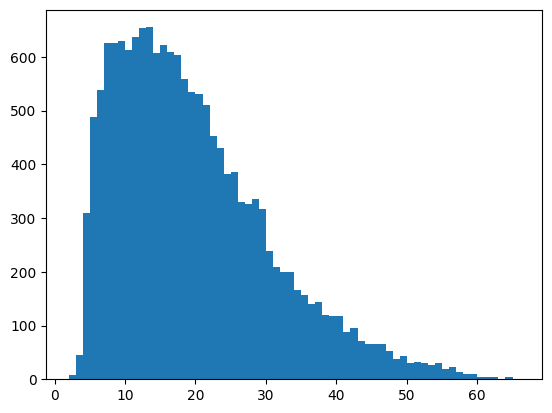

In [25]:
lengths = [len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [27]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [28]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
  return padded

In [29]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [30]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [31]:
classes = set(labels)
print(classes) #0: anger, 1: joy, 2: love, 3: surprise, 4: fear, 5: sadness

{0, 1, 2, 3, 4, 5}


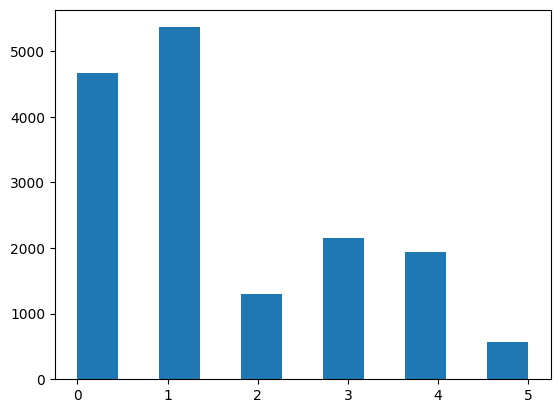

In [44]:
plt.hist(labels, bins=11)
plt.show()

In [66]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_classes = dict((v,k) for k,v in class_to_index.items())

In [67]:
class_to_index

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [63]:
# prompt: how to change #0: anger, 1: joy, 2: love, 3: surprise, 4: fear, 5: sadness

# class_to_index = { 'anger': 0, 'joy': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'sadness': 5}
# index_to_classes = dict((v,k) for k,v in class_to_index.items())


In [68]:
index_to_classes

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5}

In [69]:
import numpy as np

In [70]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [77]:
train_labels = names_to_ids(labels)
print(train_labels[0])

0


## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [80]:
import tensorflow as tf

In [83]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
        tf.keras.layers.Dense(6, activation='softmax')

])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 50, 40)            5920      
 onal)                                                           
                                                                 
 bidirectional_4 (Bidirecti  (None, 40)                9760      
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175926 (687.21 KB)
Trainable params: 175926 (687.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [85]:
 val_tweets, val_labels = get_tweet(val)
 val_seq = get_sequences(tokenizer, val_tweets)
 val_labels = names_to_ids(val_labels)

In [86]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [88]:
h = model.fit(
    padded_train_seq, train_labels,
    validation_data=(val_seq, val_labels),
    epochs=20,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
)

Epoch 1/20
500/500 [==============================] - 34s 53ms/step - loss: 1.2822 - accuracy: 0.4992 - val_loss: 0.7422 - val_accuracy: 0.7370
Epoch 2/20
500/500 [==============================] - 11s 21ms/step - loss: 0.4998 - accuracy: 0.8272 - val_loss: 0.4485 - val_accuracy: 0.8475
Epoch 3/20
500/500 [==============================] - 12s 23ms/step - loss: 0.2441 - accuracy: 0.9181 - val_loss: 0.3635 - val_accuracy: 0.8835
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: 0.1579 - accuracy: 0.9498 - val_loss: 0.3520 - val_accuracy: 0.8850
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1177 - accuracy: 0.9610 - val_loss: 0.3651 - val_accuracy: 0.8845
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.0979 - accuracy: 0.9681 - val_loss: 0.3724 - val_accuracy: 0.8875
Epoch 7/20
500/500 [==============================] - 7s 15ms/step - loss: 0.0793 - accuracy: 0.9751 - val_loss: 0.3779 - val_accuracy: 0.8

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

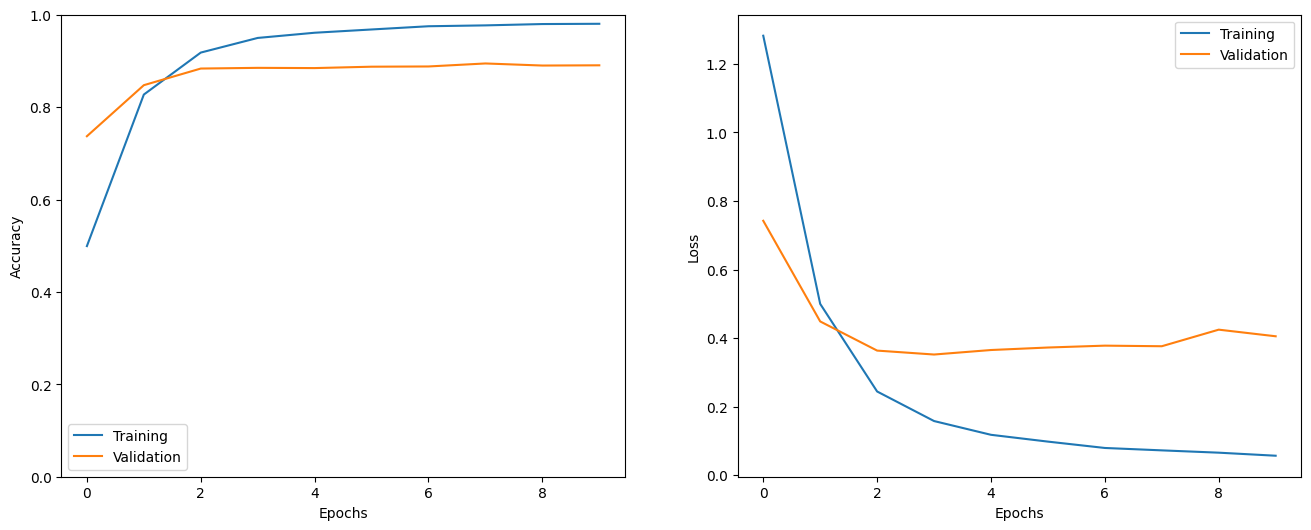

In [92]:
show_history(h)

In [94]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [95]:
_ = model.evaluate(test_seq, test_labels)

63/63 [==============================] - 0s 7ms/step - loss: 0.4043 - accuracy: 0.8945


In [105]:
i = random.randint(0, len(test_labels) - 1)
print('Sentence:', test_tweets[i])
print('Emotion: ', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:', pred_class)



Sentence: i have a good feeling about this so i am excited
Emotion:  1
1/1 [==============================] - 0s 20ms/step
Predicted Emotion: 1


In [110]:
preds = np.argmax(model.predict(test_seq), axis=-1)

63/63 [==============================] - 1s 8ms/step


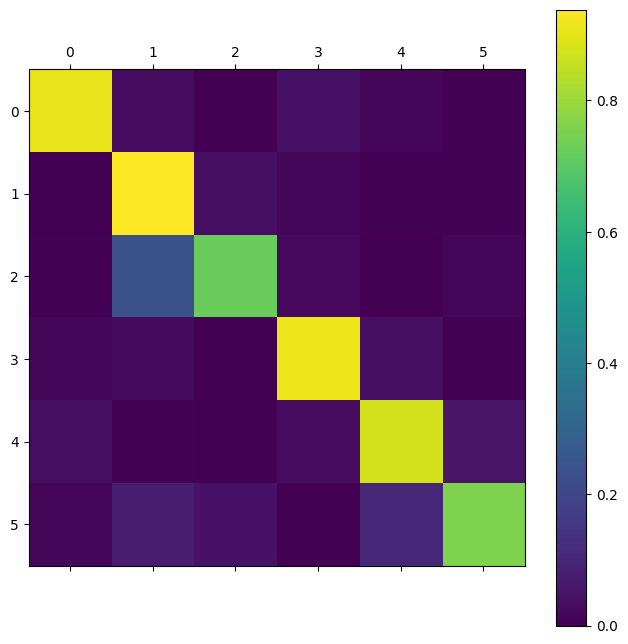

In [111]:
show_confusion_matrix(test_labels, preds, list(classes))